In [6]:
import pandas as pd

# Car price prediction problem
class DemandPrediction:
    N_DEMAND_INDICATORS = 13;
    # Parameters consist of a bias (intercept) for the sum and one weight for
    # each demand indicator.
    N_PARAMETERS = N_DEMAND_INDICATORS + 1;
    

    # Construct a car price prediction problem instance.
    # The parameter "dataset_name" specifies which dataset to use. Valid values
    # are "train" or "test".
    def __init__(self,dataset_name):    
      #Load the specified dataset
      if(dataset_name == "train"):
        self.__X, self.__y = DemandPrediction.__load_dataset("data/train.csv");
      elif(dataset_name == "test"):
        self.__X, self.__y = DemandPrediction.__load_dataset("data/test.csv");
      else:
        raise Exception("Only permitted arguments for " +
          "CarPricePrediction::__init__ are train and test.")
    
    # Rectangular bounds on the search space.
    # Returns a 2D array b such that b[i][0] is the minimum permissible value
    # of the ith solution component and b[i][1] is the maximum.    
    def bounds():
        return [[-100,100] for i in range(DemandPrediction.N_PARAMETERS)]

    # Check whether the function parameters (weights) lie within the
    # problem's feasible region.
    # There should be the correct number of weights for the predictor function.
    # Each weight should lie within the range specified by the bounds.
    def is_valid(parameters):
        if(len(parameters) != DemandPrediction.N_PARAMETERS):
          return False
        #All weights lie within the bounds.
        b = DemandPrediction.bounds();
        for i in range(len(b)):
          if(parameters[i] < b[i][0] or parameters[i] > b[i][1] ):
            return False
        return True;

    # Evaluate a set of parameters on the dataset used by the class instance
    # (train/test).
    # @param parameters An containing the bias and weights to be used to
    #   predict demand.
    # @return The mean absolute error of the predictions on the selected
    # dataset.
    def evaluate(self, parameters):
        abs_error = 0.0;
        for (x, y) in zip(self.__X,self.__y):
            #print(list(self.__X.values))
            #print(x)
            #print(y)
            #print('--')
            y_pred = DemandPrediction.__predict(x,parameters);
            abs_error += abs(y-y_pred);
        abs_error /= len(self.__X);
        return abs_error;

    def __load_dataset(filename):
        df = pd.read_csv(filename,header=None)
        y = df.iloc[:,0].values
        X = df.iloc[:,1:].values
        return X, y
        
    # Predicts demand based on a weighted sum of demand indicators. You may
    # replace this with something more complex, but will likely have to change
    # the form of the parameters array as well.
    def __predict(demand_indicators, parameters):
        prediction = parameters[0];

        for i in range(len(demand_indicators)):
            prediction += demand_indicators[1] * parameters[i+1];

        return prediction;

In [29]:
import random
import time


class GeneticProgramming:
    POPULATION_SIZE = 100
    GENERATIONS = 100
    MUTATION_RATE = 0.1
    TOURNAMENT_SIZE = 5

    def __init__(self, problem):
        self.problem = problem

    # Generate an initial population of random individuals
    def generate_population(self):
        population = []
        for i in range(GeneticProgramming.POPULATION_SIZE):
            individual = []
            for j in range(DemandPrediction.N_PARAMETERS):
                individual.append(random.uniform(-100, 100))
            population.append(individual)
        return population

    # Evaluate the fitness of an individual by calculating its mean absolute
    # error on the training dataset
    def evaluate_fitness(self, individual):
        return self.problem.evaluate(individual)

    # Select individuals for the next generation using tournament selection
    def tournament_selection(self, population):
        tournament = random.sample(population, GeneticProgramming.TOURNAMENT_SIZE)
        best_individual = min(tournament, key=self.evaluate_fitness)
        return best_individual

    # Crossover two individuals to create a new offspring
    def crossover(self, parent1, parent2):
        child = []
        for i in range(DemandPrediction.N_PARAMETERS):
            if random.random() < 0.5:
                child.append(parent1[i])
            else:
                child.append(parent2[i])
        return child

    # Mutate an individual by replacing one of its parameters with a random value
    def mutate(self, individual):
        mutated_individual = individual.copy()
        if random.random() < GeneticProgramming.MUTATION_RATE:
            index = random.randint(0, DemandPrediction.N_PARAMETERS - 1)
            mutated_individual[index] = random.uniform(-100, 100)
        return mutated_individual

    # Run the genetic programming algorithm
    def run(self):
        start_time = time.time()
        population = self.generate_population()
        best_fitness_scores = []
        best_individual = None
        for i in range(GeneticProgramming.GENERATIONS):
            new_population = []
            new_population = []
            fitness_scores = []
            for j in range(GeneticProgramming.POPULATION_SIZE):
                parent1 = self.tournament_selection(population)
                parent2 = self.tournament_selection(population)
                child = self.crossover(parent1, parent2)
                child = self.mutate(child)
                new_population.append(child)
                fitness_scores.append(self.evaluate_fitness(child))
            population = new_population
            best_fitness_score = min(fitness_scores)
            best_fitness_scores.append(best_fitness_score)
            if best_individual is None or self.evaluate_fitness(best_individual) > best_fitness_score:
                best_individual = population[fitness_scores.index(best_fitness_score)]

        best_individual = min(population, key=self.evaluate_fitness)

        end_time = time.time()
        time_taken = end_time - start_time
        print("Best individual: ", best_individual)
        print("Fitness: ", self.evaluate_fitness(best_individual))
        print("Best fitness score: ", min(best_fitness_scores))
        print("Time taken: ", time_taken)


problem = DemandPrediction("train")
gp = GeneticProgramming(problem)
gp.run()

Best individual:  [90.36733606521904, -48.212868650637716, -61.541861105079754, 70.42207051940682, 32.44304849519807, -69.1234662170489, 78.88796129626147, -31.784261280623667, 29.369461083103204, 6.009627373026234, -9.425816797694637, -13.228620690577088, 45.674417635514516, -28.71320166659686]
Fitness:  38.558384677440216
Best fitness score:  38.558384677440216
Time taken:  14.535594940185547


In [22]:

import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np


# Create an instance of the demand prediction problem for the training dataset
demand_train = DemandPrediction("train")

# Create an instance of the genetic programming algorithm for the demand prediction problem
gp = GeneticProgramming(demand_train)

# Set up the hyperparameters to tune
population_sizes = [50, 100, 200]
generations = [50, 100, 200]
mutation_rates = [0.05, 0.1, 0.2]
tournament_sizes = [3, 5, 7]
experiment_number = 0
experiment_results = {}
mae_train_list = []
mae_test_list = []


# Perform a grid search over the hyperparameters and evaluate the MAE on the training and test datasets
for p in population_sizes:
    for g in generations:
        for m in mutation_rates:
            for t in tournament_sizes:
                gp.POPULATION_SIZE = p
                gp.GENERATIONS = g
                gp.MUTATION_RATE = m
                gp.TOURNAMENT_SIZE = t
                population = gp.generate_population()
                best_individual = None
                for i in range(gp.GENERATIONS):
                    new_population = []
                    for j in range(gp.POPULATION_SIZE):
                        parent1 = gp.tournament_selection(population)
                        parent2 = gp.tournament_selection(population)
                        child = gp.crossover(parent1, parent2)
                        mutated_child = gp.mutate(child)
                        new_population.append(mutated_child)
                    population = new_population
                    best_individual = min(population, key=gp.evaluate_fitness)
                demand_test = DemandPrediction("test")
                mae_train = gp.evaluate_fitness(best_individual)
                mae_test = demand_test.evaluate(best_individual)
                experiment_number += 1
                experiment_results[experiment_number] = {
                    'Population size': p,
                    'Generations': g,
                    'Mutation rate': m,
                    'Tournament size': t,
                    'MAE Train': mae_train,
                    'MAE Test': mae_test
                }
                mae_train_list.append(mae_train)
                mae_test_list.append(mae_test)

                print(f'########################## Experiment number: {experiment_number} ###############################')
                print(f'')
                print(f"Population size: {p}, Generations: {g}, Mutation rate: {m}, Tournament size: {t}")
                print(f"MAE on training dataset: {mae_train}")
                print(f"MAE on test dataset: {mae_test}")
                print('')

print('')
print('Overall Experimental results')
df = pd.DataFrame.from_dict(experiment_results)
df.T

########################## Experiment number: 1 ###############################

Population size: 50, Generations: 50, Mutation rate: 0.05, Tournament size: 3
MAE on training dataset: 86.10304674028515
MAE on test dataset: 106.15947319054261

########################## Experiment number: 2 ###############################

Population size: 50, Generations: 50, Mutation rate: 0.05, Tournament size: 5
MAE on training dataset: 59.77245822071042
MAE on test dataset: 75.17562121699872

########################## Experiment number: 3 ###############################

Population size: 50, Generations: 50, Mutation rate: 0.05, Tournament size: 7
MAE on training dataset: 70.96196500854344
MAE on test dataset: 85.94381622964875

########################## Experiment number: 4 ###############################

Population size: 50, Generations: 50, Mutation rate: 0.1, Tournament size: 3
MAE on training dataset: 39.33804737651293
MAE on test dataset: 44.33534470400221

########################## Exper

,Population size,Generations,Mutation rate,Tournament size,MAE Train,MAE Test
1,50.0,50.0,0.05,3.0,86.103047,106.159473
2,50.0,50.0,0.05,5.0,59.772458,75.175621
3,50.0,50.0,0.05,7.0,70.961965,85.943816
4,50.0,50.0,0.10,3.0,39.338047,44.335345
5,50.0,50.0,0.10,5.0,38.294806,41.627238
...,...,...,...,...,...,...
77,200.0,200.0,0.10,5.0,51.238527,62.496175
78,200.0,200.0,0.10,7.0,35.906441,39.971003
79,200.0,200.0,0.20,3.0,33.678210,38.362001
80,200.0,200.0,0.20,5.0,33.786297,38.869746


In [23]:
sorted_df = df.T.sort_values(by=['MAE Test'])
sorted_df

,Population size,Generations,Mutation rate,Tournament size,MAE Train,MAE Test
81,200.0,200.0,0.20,7.0,33.860252,37.576410
75,200.0,200.0,0.05,7.0,34.029115,37.762350
26,50.0,200.0,0.20,5.0,33.936070,37.783386
53,100.0,200.0,0.20,5.0,34.120091,37.923007
16,50.0,100.0,0.20,3.0,34.307165,37.977105
...,...,...,...,...,...,...
29,100.0,50.0,0.05,5.0,82.821064,101.896289
1,50.0,50.0,0.05,3.0,86.103047,106.159473
25,50.0,200.0,0.20,3.0,86.105027,106.267133
14,50.0,100.0,0.10,5.0,116.638145,151.999453


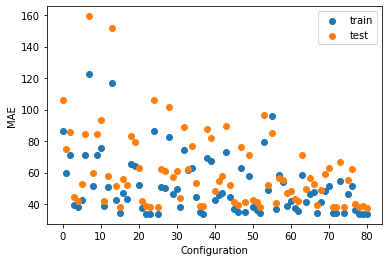

In [24]:
# Plot
plt.scatter(range(len(mae_train_list)), mae_train_list, label='train')
plt.scatter(range(len(mae_test_list)), mae_test_list, label='test')
plt.xlabel('Configuration')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [26]:
# Tests
# Shapiro-Wilk normality test and Levene's test for equal variances on the lists of MAE values for each hyperparameter configuration:
sw_train, p_train = stats.shapiro(mae_train_list)
sw_test, p_test = stats.shapiro(mae_test_list)
levene, p_levene = stats.levene(mae_train_list, mae_test_list)

print(f"Shapiro-Wilk normality test on MAE values for training dataset: p-value = {p_train:.4f}")
print(f"Shapiro-Wilk normality test on MAE values for test dataset: p-value = {p_test:.4f}")
print(f"Levene's test for equal variances of MAE values: p-value = {p_levene:.4f}")




f, p_anova = stats.f_oneway(mae_train_list, mae_test_list)
print(f"ANOVA test for significant differences in MAE values: p-value = {p_anova:.4f}")

Shapiro-Wilk normality test on MAE values for training dataset: p-value = 0.0000
Shapiro-Wilk normality test on MAE values for test dataset: p-value = 0.0000
Levene's test for equal variances of MAE values: p-value = 0.1513
ANOVA test for significant differences in MAE values: p-value = 0.0075


### Results

The results suggest that the MAE (Mean Absolute Error) values for both the training dataset and test dataset do not follow a normal distribution as indicated by the Shapiro-Wilk normality test. The p-values for both tests are very low (0.0000), which implies that we reject the null hypothesis of normality.

However, Levene's test for equal variances of MAE values suggests that there is no significant difference in variance between the MAE values of the training and test datasets. The p-value is 0.1513, which is greater than the significance level of 0.05. Hence, we fail to reject the null hypothesis of equal variances.

Finally, the ANOVA test for significant differences in MAE values indicates that there is a significant difference in the MAE values between the training and test datasets. The p-value is 0.0075, which is less than the significance level of 0.05. Therefore, we reject the null hypothesis of no significant difference.

In conclusion, the MAE values for the training and test datasets are not normally distributed, and there is a significant difference in the MAE values between the training and test datasets. However, there is no significant difference in variance between the MAE values of the training and test datasets.